# Importación de librerías

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model
import numpy as np
import os

# Preparación del modelo

In [2]:
# Etiquetas de cada clase corresponidente a los índices
labels = {
    0: 'Bread', 
    1: 'Dairy product', 
    2: 'Dessert', 
    3: 'Egg', 
    4: 'Fried food', 
    5: 'Meat',
    6: 'Noodles-Pasta',
    7: 'Rice', 
    8: 'Seafood',
    9: 'Soup',
    10: 'Vegetable-Fruit'
}

In [3]:
# Carga del modelo
model = load_model('Food_Classification.h5')

# Predicciones del modelo

La demostración de predicciones se realizó a través de un conjunto de imágenes de ejemplo obtenidas de internet.

Este conjunto se encuentra en la carpeta *Examples*, separadas por cada clase para poder comparar su predicción con la clase original.

In [4]:
# Cargado de imagenes y guardado de predicciones
prediction = []
original = []
image = []
count = 0
examples_path = 'Examples'

# Recorre los tipos de ejemplos
for i in os.listdir(examples_path):
    # Recorre los elementos dentro de cada conjunto
    for item in os.listdir(os.path.join(examples_path, i)):
        # Carga de la imagen
        img = tf.keras.utils.load_img(os.path.join(examples_path, i, item), target_size=(150, 150))
        # Se guarda la imagen en un arreglo
        image.append(img)
        # Se realizan transformaciones a la imagen para que pueda ser utilizada
        img = np.array(img)
        img = img / 255.0
        # Se especifican las dimensiones
        img = img.reshape(1,150,150,3)
        # Predicción del modelo
        predict = model.predict(img)
        # Se obtiene el índice del valor más grande en la predicción
        predict = np.argmax(predict)
        # Se guarda el valor de ese índice en un arreglo
        prediction.append(labels[predict])
        # Se guarda la clase original para su comprobación
        original.append(i)

1/1 [==============================] - 0s 59ms/step


# Visualización de las predicciones

In [5]:
# Arreglo con numero de elementos predichos
n = []
for i in range(len(image)):
    n.append(i)

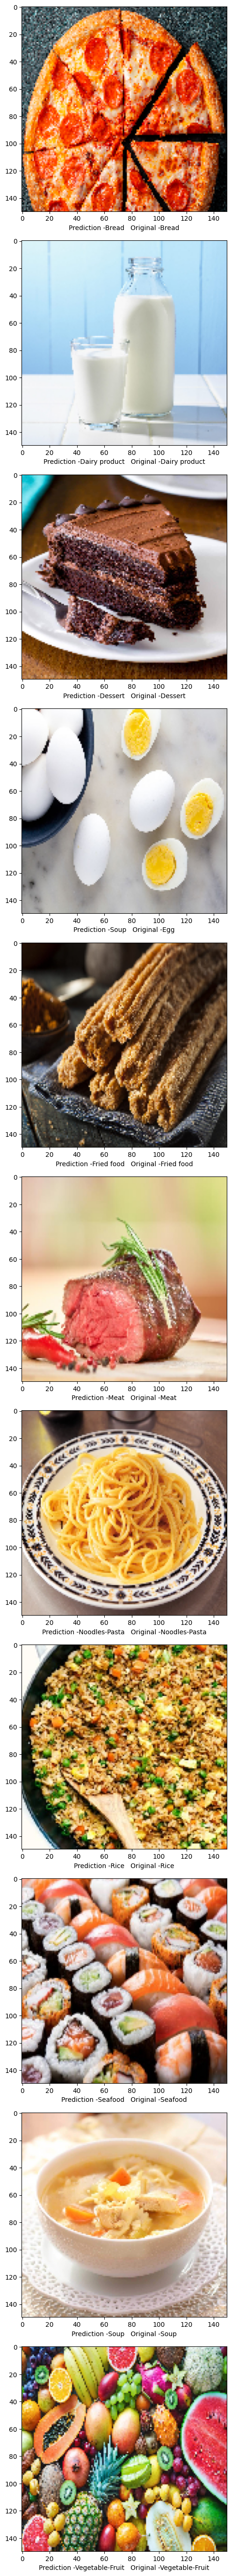

In [6]:
# Visualización de los resultados
fig = plt.figure(figsize = (100,100))

for i in n:
    fig.add_subplot(20,1,i+1)
    plt.xlabel("Prediction -" + prediction[i] +"   Original -" + original[i])
    plt.imshow(image[i])
fig.tight_layout()
plt.show()

# Conclusiones

Como se pudo observar, la gran mayoría de las entradas fueron predecidas de manera correcta.

Sin embargo, el ejemplo para los huevos no pudo ser predicho de manera adecuada, lo cual se debe al overfitting del modelo.